<h1>More Matplotlib<h1>

<h2>Problem 1: Line plots<h2>

In this problem, we will plot some daily weather data from a NOAA station in Millbrook, NY. A full description of this dataset is available at: https://www.ncdc.noaa.gov/data-access/land-based-station-data

The cell below uses pandas to download the data and populate a bunch of numpy arrays (t_daily_min, t_daily_max, etc.) Run the cell and then use the numpy arrays to try to re-create the plot you see.

In [1]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


import pandas as pd

with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

In [2]:
units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


C:\Users\panda\AppData\Local\Temp\ipykernel_20024\294233959.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(t_daily_mean, t_daily_max, labels = ["daily mean", "daily range"], labelcolor = "k", loc = "upper right")
C:\Users\panda\AppData\Local\Temp\ipykernel_20024\294233959.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color("magenta") #set the legend color individually


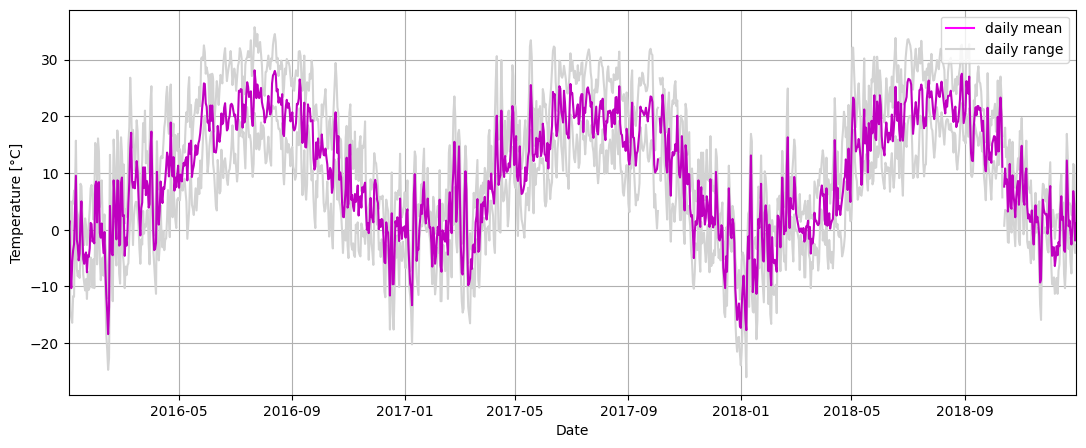

In [24]:
#using the numpy arrays to create the plots
#first one is using 2 ind variables t_daily_mean and daily range
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (13, 5))
#t_daily_range = t_daily_max - t_daily_min, not the right range 
ax.plot(date, t_daily_min, color = "#d3d3d3")
ax.plot(date, t_daily_max, color = "#d3d3d3")
ax.plot(date, t_daily_mean, color = "m")
#need to change the grid, needs to start at the very first value, need to shift left the axis, need to show origin
ax.set_xlim(date[1], date[-1])
#need to shade between min and max how do i do this
plt.fill_betweenx(t_daily_min, t_daily_max, color = "#d3d3d3")
#finally, needs to have key and label
ax.set_ylabel("Temperature [°C]")
ax.set_xlabel("Date")
ax.legend(t_daily_mean, t_daily_max, labels = ["daily mean", "daily range"], labelcolor = "k", loc = "upper right")
leg = ax.get_legend()
leg.legendHandles[0].set_color("magenta") #set the legend color individually
#gridlines
ax.grid()

Note: I need to shade between the min/max values and I also need to show the origin value of 2016-01

Graph #2

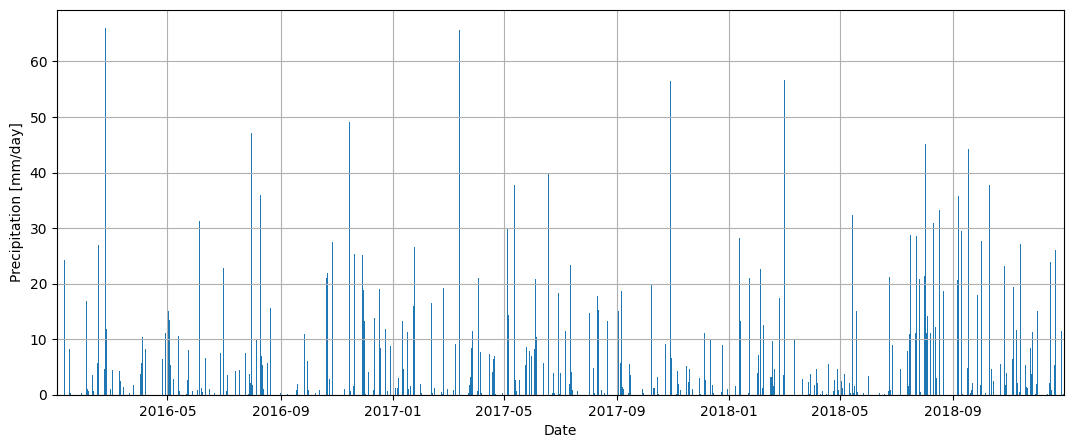

In [4]:
#bar plots
fig, ax = plt.subplots(figsize = (13,5))
ax.bar(date, p_daily_calc)
ax.set_xlim(date[1], date[-1])
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation [mm/day]")
ax.grid()
#make lines thicker and darker color how to do


Graph #3

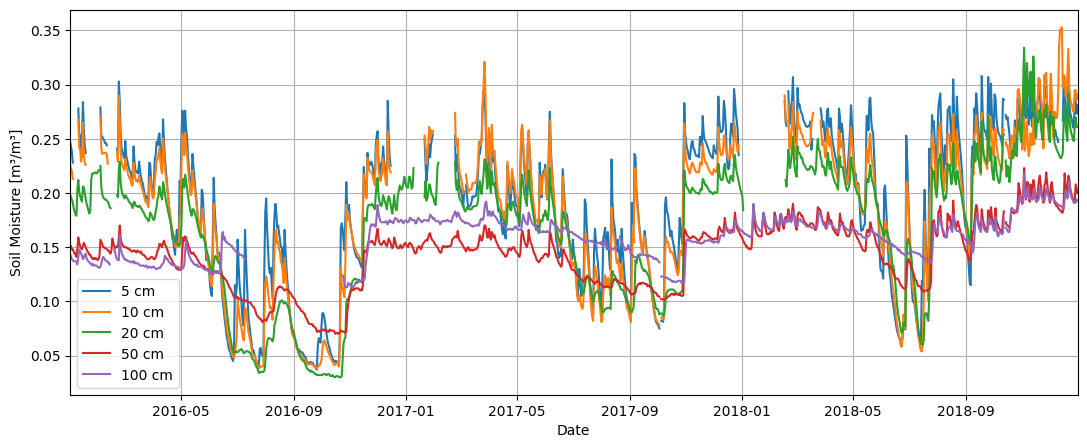

In [5]:
fig, ax = plt.subplots(figsize = (13,5))
ax.set_xlim(date[1], date[-1])
ax.set_xlabel("Date")
ax.set_ylabel("Soil Moisture [m³/m³]")
ax.plot(date, soil_moisture_5)
ax.plot(date, soil_moisture_10)
ax.plot(date, soil_moisture_20)
ax.plot(date, soil_moisture_50)
ax.plot(date, soil_moisture_100)
ax.legend(["5 cm", "10 cm", "20 cm", "50 cm", "100 cm"])
ax.grid()

<h2>Problem 2: Counter Plots<h2>

Now we will visualize some global temperature data from the NCEP-NCAR atmospheric reanalysis.

In [6]:
import xarray as xr
ds_url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
ds = xr.open_dataset(ds_url, decode_times=False)

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays) 
#### NO XARRAY ALLOWED!
#########################################################

temp = ds.temp[-1].values - 273.15
lon = ds.X.values
lat = ds.Y.values

Text(0.5, 1.0, 'Current Global Temperature')

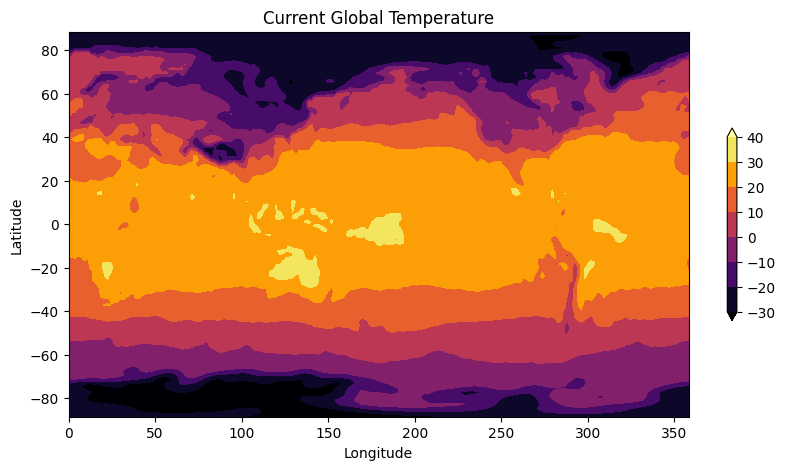

In [43]:
import numpy as np
fig, ax = plt.subplots(figsize= (10,5))
clevels = np.arange(-30,50,10)
cf0 = ax.contourf(lon, lat, temp, clevels, cmap = "inferno", extend = "both")
# c = ax.contour(lon, lat, temp, colors = "white")
ax.plot()
#colorbar
cbar = plt.colorbar(cf0, shrink = 0.5)
#contour the white

#labeling the axes
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Current Global Temperature")
#need to make a second plot next to it?
#why are the colors not matching?, do i have to put another graph on it?
#not enough details

<h2>Problem 3: Scatter plots<h2>

Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by log10(depth) and adjust the marker size to be magntiude^4/100

In [44]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of 'C:\Users\panda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\Local\pooch\pooch\Cache\031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip' to 'C:\Users\panda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\Local\pooch\pooch\Cache\031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip.unzip'


In [51]:
#how do i make longitude and latitude the same size
fig, ax = plt.subplots(figsize = (13,5))
# scatterplot = ax.scatter(lon, lat)
# ax.colorbar(scatterplot)

(1, 94)

NOTE: Did not finish problem 3, could not finish problem 2